In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'salary.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
max(df)

'yrs.since.phd'

In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


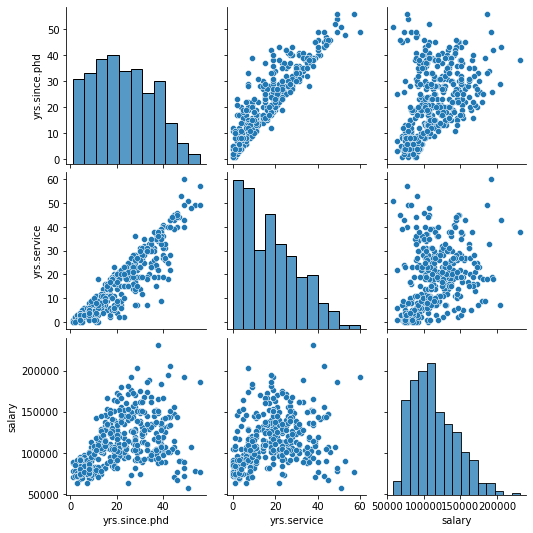

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='salary', ylabel='yrs.service'>

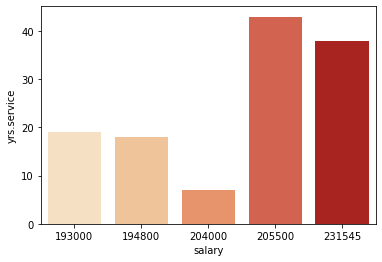

In [19]:
sns.barplot(x='salary',y='yrs.service',data=df.nlargest(5,'salary'),palette='OrRd')


<AxesSubplot:xlabel='sex', ylabel='salary'>

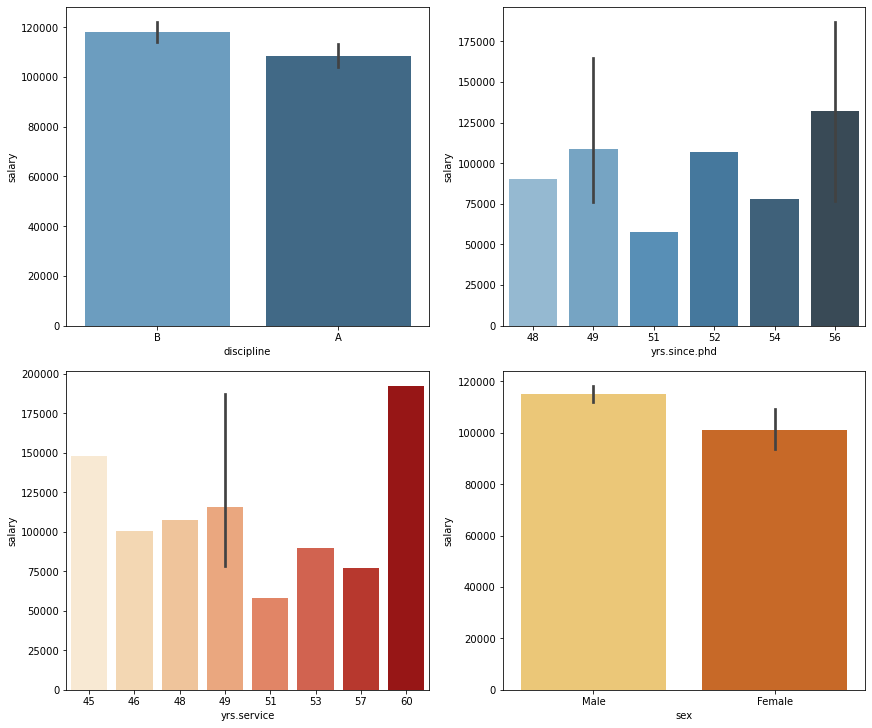

In [31]:

fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,10))
sns.barplot(x='discipline',y='salary',data=df,ax=axes[0,0], palette="Blues_d")

sns.barplot(x='yrs.since.phd' ,y='salary',data=df.nlargest(10,'yrs.since.phd'),ax=axes[0,1],palette="Blues_d")

sns.barplot(x='yrs.service' ,y='salary',data=df.nlargest(10,'yrs.service'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='sex' ,y='salary',data=df,ax=axes[1,1], palette='YlOrBr')

<AxesSubplot:xlabel='sex', ylabel='salary'>

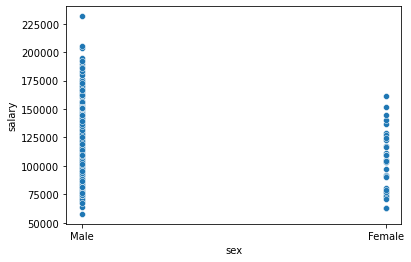

In [32]:
sns.scatterplot(x='sex',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

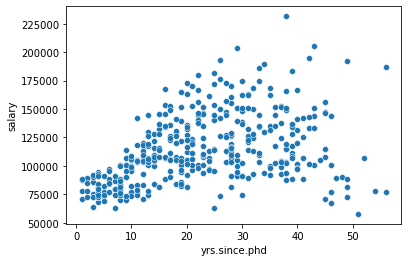

In [34]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

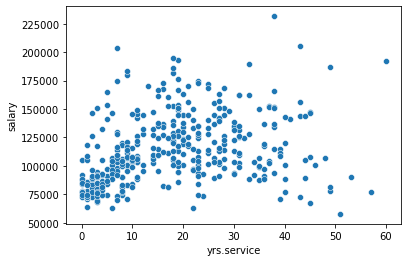

In [35]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

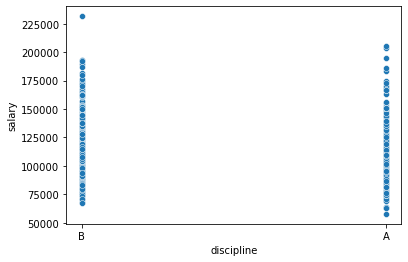

In [37]:
sns.scatterplot(x='discipline',y='salary',data=df)

In [80]:
df.corr()

,yrs.since.phd,yrs.service,sex,salary
yrs.since.phd,1.000000,0.909649,-0.148788,0.419231
yrs.service,0.909649,1.000000,-0.153740,0.334745
sex,-0.148788,-0.153740,1.000000,-0.138610
salary,0.419231,0.334745,-0.138610,1.000000


In [81]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
sex             -0.138610
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

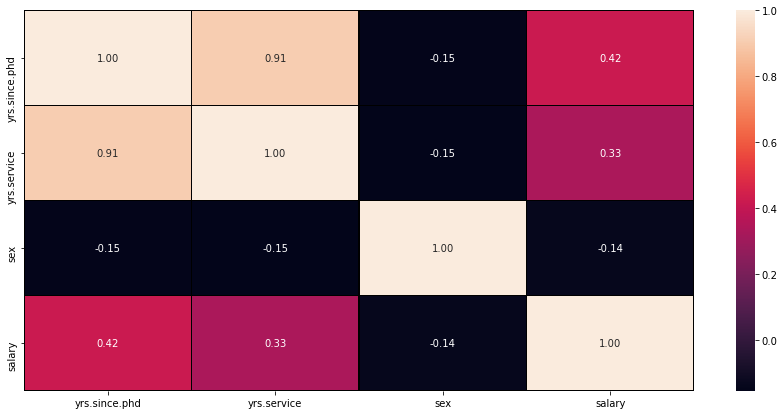

In [82]:

plt.figure(figsize =(15,7))
sns.heatmap(df.corr(),annot = True ,linewidths = 0.5,linecolor = 'black' , fmt = '.2f')

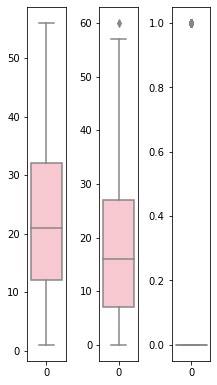

In [84]:
collist = df.columns.values
ncol=30
nrow=17
plt.figure(figsize=(ncol,3*ncol))
for i in range(2,len(collist)-1): # here it start from and subtract '-1' from last bcz string does not show ouliers
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data =df[collist[i]],color = 'pink',orient = 'v')
    plt.tight_layout()

In [86]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='salary', ylabel='Density'>

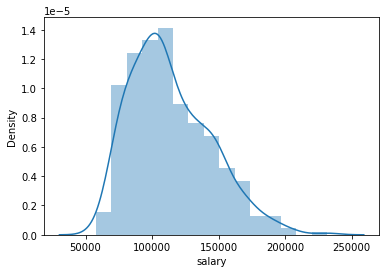

In [87]:
sns.distplot(df['salary'])


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

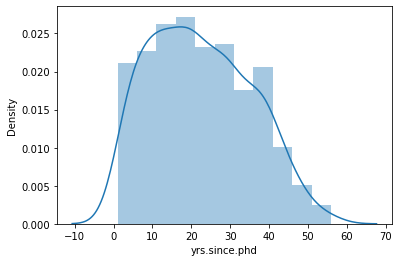

In [88]:
sns.distplot(df['yrs.since.phd'])


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

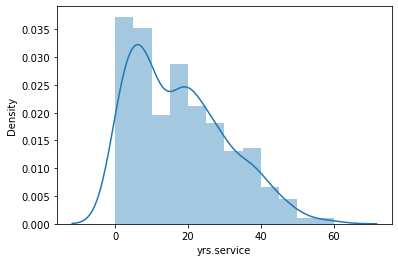

In [89]:
sns.distplot(df['yrs.service'])


<AxesSubplot:xlabel='sex', ylabel='Density'>

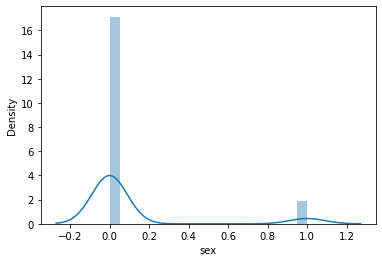

In [91]:
sns.distplot(df['sex'])


In [100]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['rank']=LE.fit_transform(df['rank'])
df['rank'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      1
3      2
4      2
      ..
392    2
393    2
394    2
395    2
396    1
Name: rank, Length: 397, dtype: int32>

In [135]:
df['rank'][0:20]

0          Prof
1          Prof
2      AsstProf
3          Prof
4          Prof
5     AssocProf
6          Prof
7          Prof
8          Prof
9          Prof
10    AssocProf
11     AsstProf
12     AsstProf
13     AsstProf
14         Prof
15         Prof
16         Prof
17         Prof
18         Prof
19         Prof
Name: rank, dtype: object

In [101]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [102]:
df.shape


(397, 6)

# Changing The  string data into integers  


In [103]:


def gender_to_number(sex):
    if sex=="Male":
        return 0
    if sex=="Female":
        return 1
    else: 
        return 2 

In [104]:
df = pd.read_csv("salary.csv", quotechar='"', converters={"sex": gender_to_number})
df


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,0,139750
1,Prof,B,20,16,0,173200
2,AsstProf,B,4,3,0,79750
3,Prof,B,45,39,0,115000
4,Prof,B,40,41,0,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,0,103106
393,Prof,A,31,19,0,150564
394,Prof,A,42,25,0,101738
395,Prof,A,25,15,0,95329


df = df.drop(['discipline','rank'],axis=1)


df = df.drop(['rank'],axis=1)


In [147]:
df

,yrs.since.phd,yrs.service,sex,salary
0,19,18,0,139750
1,20,16,0,173200
2,4,3,0,79750
3,45,39,0,115000
4,40,41,0,141500
...,...,...,...,...
392,33,30,0,103106
393,31,19,0,150564
394,42,25,0,101738
395,25,15,0,95329


In [149]:
X = df.iloc[:,1:]
y = df.iloc[:, 0]

In [150]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [152]:
scaler = StandardScaler().fit(X_train) 
S_X_train = scaler.transform(X_train) 
S_X_test = scaler.transform(X_test) 

In [153]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Standard linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Standard linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Standard linear regression R2 =  0.8303436305146653 

Standard linear regression coefficients :
yrs.service : 0.8550553776533899
sex : 0.021731145740349088
salary : 5.369279954222355e-05


In [154]:
ridge_reg = Ridge().fit(S_X_train, y_train)
y_pred = ridge_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Ridge linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Ridge linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Ridge linear regression R2 =  0.8302362503082285 

Ridge linear regression coefficients :
yrs.service : 0.8550553776533899
sex : 0.021731145740349088
salary : 5.369279954222355e-05


In [155]:
lasso_reg = Lasso().fit(S_X_train, y_train)
y_pred = lasso_reg.predict(S_X_test)
r2 = r2_score(y_test, y_pred)
print("Lasso linear regression R2 = ", r2, "\n")
coef = reg.coef_
print("Lasso linear regression coefficients :")
i = 0; 
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1

Lasso linear regression R2 =  0.8167574143577181 

Lasso linear regression coefficients :
yrs.service : 0.8550553776533899
sex : 0.021731145740349088
salary : 5.369279954222355e-05


# --:Best-performing model was standard  linear regression regression using standardized data with some margin. This model gave an R2 score of 0.83 .
​
